In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1. load your training data
#Loading Data set
Dataset = pd.read_csv('./data/q2_dataset.csv')
Dataset

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91
...,...,...,...,...,...,...
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21


In [3]:
type(Dataset)

pandas.core.frame.DataFrame

In [4]:
list(Dataset.columns)

['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [5]:
Dataset.columns = Dataset.columns.str.strip()
list(Dataset.columns)

['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low']

In [6]:
# we are sorting the data in the ascending order because we are predicting the opening price
# from the price of the past 3 days
Dataset['target']= Dataset['Open']
Dataset['Date'] =pd.to_datetime(Dataset.Date)
Dataset=Dataset.sort_values(by='Date')
Dataset.reset_index(inplace=True, drop=True)
Dataset

,Date,Close/Last,Volume,Open,High,Low,target
0,2015-07-09,$120.07,78291510,123.85,124.06,119.22,123.85
1,2015-07-10,$123.28,61292800,121.94,123.85,121.21,121.94
2,2015-07-13,$125.66,41365600,125.03,125.76,124.32,125.03
3,2015-07-14,$125.61,31695870,126.04,126.37,125.04,126.04
4,2015-07-15,$126.82,33559770,125.72,127.15,125.58,125.72
...,...,...,...,...,...,...,...
1254,2020-07-01,$364.11,27684310,365.12,367.36,363.91,365.12
1255,2020-07-02,$364.11,28510370,367.85,370.47,363.64,367.85
1256,2020-07-06,$373.85,29663910,370.00,375.78,369.87,370.00
1257,2020-07-07,$372.69,28106110,375.41,378.62,372.23,375.41


In [7]:
# checking if there are null values
Dataset.isna().sum()

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
target        0
dtype: int64

We can see that there are no null values in our dataset

In [8]:
column_names=['Open1','High1','Low1','Volume1','Open2','High2','Low2','Volume2','Open3','High3','Low3','Volume3','Date','target']

In [9]:
df = pd.DataFrame(columns = column_names)
# Insert data (3 days) + next date opening as target into dataframe
for i in range(2, len(Dataset)-1):
    d = {"Open1":Dataset.iloc[i-2][3], "High1":Dataset.iloc[i-2][4], "Low1":Dataset.iloc[i-2][5], "Volume1":Dataset.iloc[i-2][2], "Open2":Dataset.iloc[i-1][3], "High2":Dataset.iloc[i-1][4], "Low2":Dataset.iloc[i-1][5], "Volume2":Dataset.iloc[i-1][2], "Open3":Dataset.iloc[i][3], "High3":Dataset.iloc[i][4], "Low3":Dataset.iloc[i][5], "Volume3":Dataset.iloc[i][2], "Date":Dataset.iloc[i+1][0],"target":Dataset.iloc[i+1][3]}
    df = df.append(d, ignore_index=True)

In [10]:
df

,Open1,High1,Low1,Volume1,Open2,High2,Low2,Volume2,Open3,High3,Low3,Volume3,Date,target
0,123.85,124.06,119.22,78291510,121.94,123.85,121.21,61292800,125.03,125.76,124.32,41365600,2015-07-14,126.04
1,121.94,123.85,121.21,61292800,125.03,125.76,124.32,41365600,126.04,126.37,125.04,31695870,2015-07-15,125.72
2,125.03,125.76,124.32,41365600,126.04,126.37,125.04,31695870,125.72,127.15,125.58,33559770,2015-07-16,127.74
3,126.04,126.37,125.04,31695870,125.72,127.15,125.58,33559770,127.74,128.57,127.35,35987630,2015-07-17,129.08
4,125.72,127.15,125.58,33559770,127.74,128.57,127.35,35987630,129.08,129.62,128.31,45970470,2015-07-20,130.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,364.41,365.32,353.02,51314210,353.25,362.17,351.28,32661520,360.08,365.98,360.00,35055820,2020-07-01,365.12
1252,353.25,362.17,351.28,32661520,360.08,365.98,360.00,35055820,365.12,367.36,363.91,27684310,2020-07-02,367.85
1253,360.08,365.98,360.00,35055820,365.12,367.36,363.91,27684310,367.85,370.47,363.64,28510370,2020-07-06,370.00
1254,365.12,367.36,363.91,27684310,367.85,370.47,363.64,28510370,370.00,375.78,369.87,29663910,2020-07-07,375.41


In [11]:
df.isna().sum()

Open1      0
High1      0
Low1       0
Volume1    0
Open2      0
High2      0
Low2       0
Volume2    0
Open3      0
High3      0
Low3       0
Volume3    0
Date       0
target     0
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
#split the dataset into 70% training and 30% testing
train, test = train_test_split(df, test_size=0.30, random_state=0)
#saveing the train and test data in separate csv files 
train.to_csv('./data/train_data_RNN.csv',index=False)
test.to_csv('./data/test_data_RNN.csv',index=False)

In [13]:
# reading the train and test csv
data_train = pd.read_csv('./data/train_data_RNN.csv')
data_test = pd.read_csv('./data/test_data_RNN.csv')

In [14]:
#separating features and target
#the X_train and y_test contains only the target data
# X_train and X_test contains the volume, open, high, low values of previous 3 days
X_train = data_train.drop(['Date','target'], axis = 1)
y_train = data_train['target']
X_test_date = data_test
X_test = data_test.drop(['Date','target'], axis = 1)
y_test = data_test['target']

We are scalling the data becasue the data is widely varied. We are using MinMaxScaler where we subtracts the minimum value in the feature and then divides by the range. The range of the values will be from 0 to 1
Scaled values of X are created using the following formula:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min

In [15]:
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
X_train

array([[[0.26949793],
        [0.28620284],
        [0.27437691],
        ...,
        [0.28161701],
        [0.27707898],
        [0.15606877]],

       [[0.78186072],
        [0.77930961],
        [0.78971724],
        ...,
        [0.7855027 ],
        [0.78358077],
        [0.12662877]],

       [[0.30466079],
        [0.29888497],
        [0.30381869],
        ...,
        [0.27527444],
        [0.27785848],
        [0.08189741]],

       ...,

       [[0.76739248],
        [0.76057141],
        [0.77430404],
        ...,
        [0.785433  ],
        [0.76972682],
        [0.16628687]],

       [[0.22235019],
        [0.22175911],
        [0.22671622],
        ...,
        [0.21819132],
        [0.22215923],
        [0.06986057]],

       [[0.3011697 ],
        [0.29738876],
        [0.28221105],
        ...,
        [0.27907301],
        [0.27247281],
        [0.17712237]]])

In [19]:
X_test

array([[[0.13582868],
        [0.13145239],
        [0.13802653],
        ...,
        [0.14392751],
        [0.14420862],
        [0.29073861]],

       [[0.19841641],
        [0.19767732],
        [0.20274013],
        ...,
        [0.18989371],
        [0.18998689],
        [0.08808983]],

       [[0.08414612],
        [0.08018952],
        [0.08398921],
        ...,
        [0.08304583],
        [0.0792616 ],
        [0.25654237]],

       ...,

       [[0.20107972],
        [0.19418617],
        [0.20168343],
        ...,
        [0.20094093],
        [0.2031322 ],
        [0.05745194]],

       [[0.70070182],
        [0.69566456],
        [0.68280863],
        ...,
        [0.64673288],
        [0.62158523],
        [0.22453785]],

       [[0.69184812],
        [0.68034626],
        [0.68900306],
        ...,
        [0.67335773],
        [0.68355596],
        [0.00428033]]])

LSTMs enable RNNs to remember inputs over a long period of time. This is because LSTMs contain information in a memory, much like the memory of a computer.

The Model which we have designed has 2 LSTM layer
LSTM LAYER 1 - 50 units --> LSTM LAYER 2 - 150 units --> Dense Layer --> 1 unit

In [20]:
# Building a Model
model = Sequential()
#adding LSTM layer with 50 LSTM units
model.add(LSTM(50,input_shape=(X_train.shape[1],1),return_sequences=True))
#adding LSTM layer with 150 LSTM units
model.add(LSTM(150))
#adding dense layer
model.add(Dense(1,activation='linear'))

#'mean_squared_error' has been used as loss function
# Optimizer: Here adam optimizer has been used. 
# Adam is an adaptive learning rate optimization algorithm that’s been designed specifically for
# training deep neural networks.

model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mae'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 150)               120600    
                                                                 
 dense (Dense)               (None, 1)                 151       
                                                                 
Total params: 131,151
Trainable params: 131,151
Non-trainable params: 0
_________________________________________________________________


In [22]:
History = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=750,batch_size=64,verbose=1)

Epoch 1/750
14/14 [==============================] - 3s 76ms/step - loss: 32892.2695 - mae: 170.1631 - val_loss: 33433.3555 - val_mae: 172.6990
Epoch 2/750
14/14 [==============================] - 0s 22ms/step - loss: 29179.4473 - mae: 159.0123 - val_loss: 29660.2383 - val_mae: 160.8883
Epoch 3/750
14/14 [==============================] - 0s 22ms/step - loss: 27241.5039 - mae: 152.5425 - val_loss: 28588.3262 - val_mae: 157.4973
Epoch 4/750
14/14 [==============================] - 0s 25ms/step - loss: 26366.5684 - mae: 149.6272 - val_loss: 27757.3652 - val_mae: 154.8327
Epoch 5/750
14/14 [==============================] - 0s 22ms/step - loss: 25608.0723 - mae: 147.0749 - val_loss: 27017.5762 - val_mae: 152.4243
Epoch 6/750
14/14 [==============================] - 0s 21ms/step - loss: 24921.3184 - mae: 144.7434 - val_loss: 26330.7578 - val_mae: 150.1543
Epoch 7/750
14/14 [==============================] - 0s 21ms/step - loss: 24281.2695 - mae: 142.4960 - val_loss: 25669.8594 - val_mae: 1

In [23]:
#saveing the model
model.save('./models/Group26_RNN_model.h5')

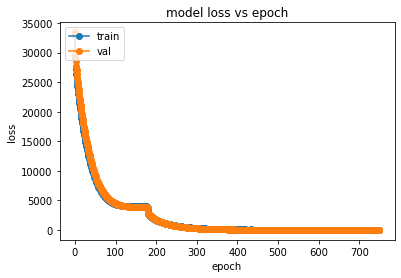

In [24]:
plt.plot(History.history['loss'],marker = 'o')
plt.plot(History.history['val_loss'], marker = 'o')
plt.title('model loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

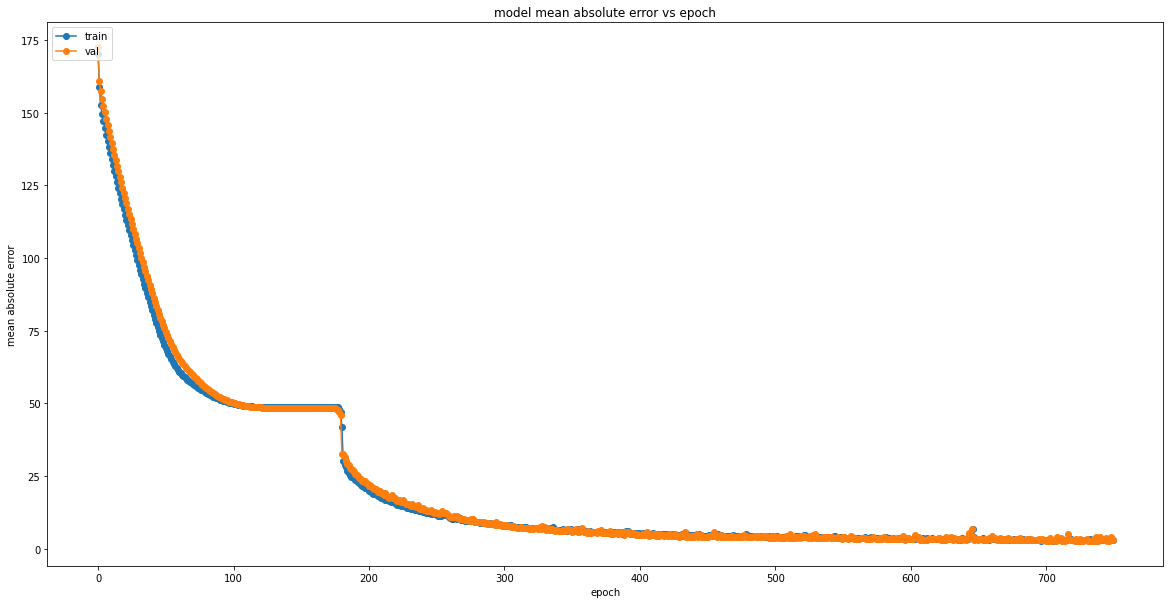

In [25]:
plt.figure(figsize=(20,10))
plt.plot(History.history['mae'],marker = 'o')
plt.plot(History.history['val_mae'],marker = 'o')
plt.title('model mean absolute error vs epoch')
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
y_test=np.array(y_test)

In [27]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 7ms/step


In [28]:
scores=model.evaluate(X_test,y_test)

12/12 [==============================] - 1s 6ms/step - loss: 20.7782 - mae: 3.1521


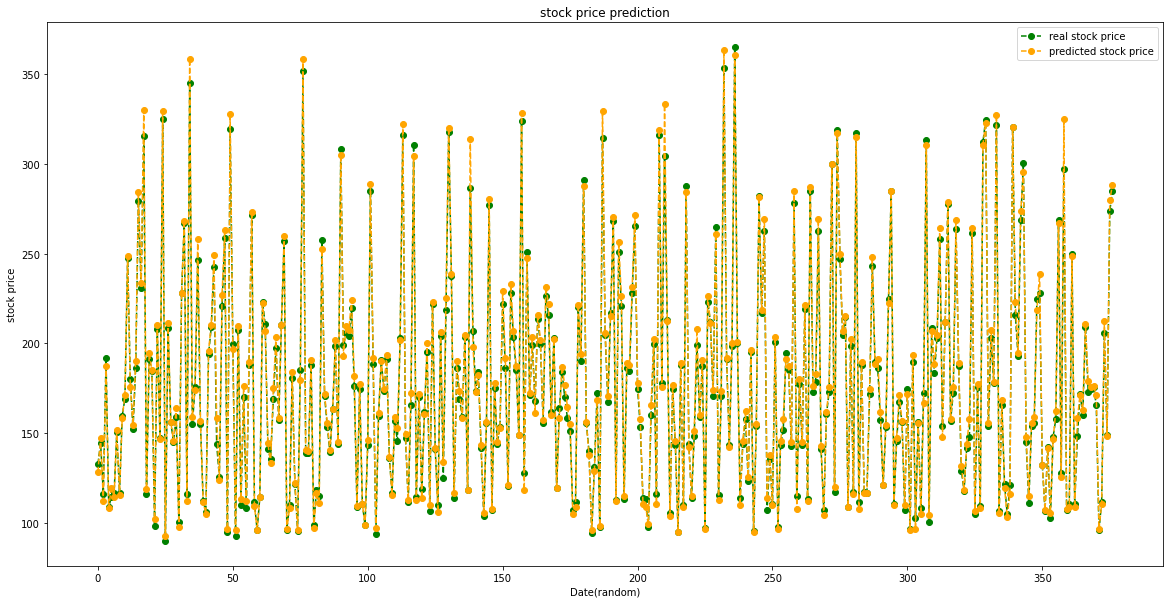

In [29]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color="green", marker='o', linestyle='dashed', label="real stock price")
plt.plot(y_pred, color="orange", marker='o', linestyle='dashed', label="predicted stock price")
plt.title("stock price prediction")
plt.xlabel("Date(random)")
plt.ylabel("stock price")
plt.legend()
plt.show()